## 3.11 模型选择、欠拟合和过拟合

### 3.11.4 多项式函数拟合实验

In [1]:
import d2lzh as d2l
import keras
import keras.backend as K
import numpy as np

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

#### 3.11.4.1 生成数据集

y = 1.2x - 3.4x^2 + 5.6x^3 + 5 + e
其中噪声项e服从均值0、标准差为0.1的正态分布

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = np.random.normal(size=(n_train + n_test, 1))
poly_features = np.concatenate((features, np.power(features, 2), np.power(features, 3)), axis=1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [3]:
features[:2], poly_features[:2], labels[:2]

(array([[-0.24232872],
        [-0.46467377]]), array([[-0.24232872,  0.05872321, -0.01423032],
        [-0.46467377,  0.21592171, -0.10033316]]), array([4.36908052, 3.06501782]))

#### 3.11.4.2 定义、训练和测试模型

In [4]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)
        

In [5]:
num_epochs = 100

def l2_loss(y_true, y_pred):
    return K.square(y_true - y_pred)

class LossCallback(keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.train_ls, self.test_ls = [], []
        
    def on_epoch_end(self, batch, logs=None):
        self.train_ls.append(logs.get('loss'))
        self.test_ls.append(logs.get('val_loss'))
        
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    model = keras.Sequential([
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='sgd', loss=l2_loss)
    batch_size = min(10, train_labels.shape[0])
    cb = LossCallback()
    model.fit(train_features, train_labels, batch_size=batch_size, epochs=num_epochs, 
              validation_data=(test_features , test_labels),
              callbacks=[cb])
    print('final epoch: train loss', cb.train_ls[-1], 'test loss', cb.test_ls[-1])
    print(len(cb.train_ls), len(cb.test_ls))
    semilogy(range(1, num_epochs + 1), cb.train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), cb.test_ls, ['train', 'test'])
    print('weight:', model.get_weights())
    

#### 3.11.4.3. 三阶多项式函数拟合（正常）

W0930 17:39:28.187221 4722030016 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 17:39:28.199918 4722030016 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0930 17:39:28.214884 4722030016 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 17:39:28.217125 4722030016 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: T

Train on 100 samples, validate on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 970us/step - loss: 282.6817 - val_loss: 14.5223
Epoch 2/100
100/100 [==============================] - 0s 94us/step - loss: 11.6326 - val_loss: 11.0967
Epoch 3/100
100/100 [==============================] - 0s 85us/step - loss: 9.4264 - val_loss: 9.0636
Epoch 4/100
100/100 [==============================] - 0s 79us/step - loss: 7.7218 - val_loss: 7.1136
Epoch 5/100
100/100 [==============================] - 0s 98us/step - loss: 5.8626 - val_loss: 5.4933
Epoch 6/100
100/100 [==============================] - 0s 88us/step - loss: 5.0011 - val_loss: 4.4479
Epoch 7/100
100/100 [==============================] - 0s 79us/step - loss: 3.9449 - val_loss: 3.5893
Epoch 8/100
100/100 [==============================] - 0s 81us/step - loss: 3.2593 - val_loss: 2.9291
Epoch 9/100
100/100 [==============================] - 0s 99us/step - loss: 2.6341 - val_loss: 2.3810
Epoch 10/100
100/100 [========

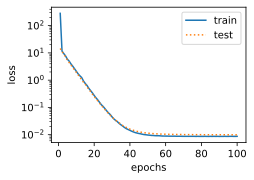

In [6]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])

#### 3.11.4.4. 线性函数拟合（欠拟合）

Train on 100 samples, validate on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 802us/step - loss: 313.8735 - val_loss: 129.8770
Epoch 2/100
100/100 [==============================] - 0s 93us/step - loss: 254.7129 - val_loss: 108.3843
Epoch 3/100
100/100 [==============================] - 0s 109us/step - loss: 214.8851 - val_loss: 95.1855
Epoch 4/100
100/100 [==============================] - 0s 99us/step - loss: 188.2409 - val_loss: 87.2251
Epoch 5/100
100/100 [==============================] - 0s 95us/step - loss: 171.2806 - val_loss: 82.9974
Epoch 6/100
100/100 [==============================] - 0s 97us/step - loss: 157.4326 - val_loss: 80.8538
Epoch 7/100
100/100 [==============================] - 0s 93us/step - loss: 150.0129 - val_loss: 80.0959
Epoch 8/100
100/100 [==============================] - 0s 96us/step - loss: 143.7898 - val_loss: 80.1432
Epoch 9/100
100/100 [==============================] - 0s 101us/step - loss: 141.6352 - val_loss: 80.5760
Epoc

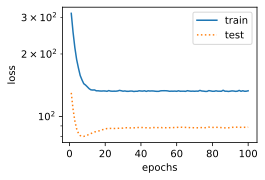

In [7]:
fit_and_plot(features[:n_train, :], features[n_train:, :], 
             labels[:n_train], labels[n_train:])

#### 3.11.4.5. 训练样本不足（过拟合）

Train on 2 samples, validate on 100 samples
Epoch 1/100
2/2 [==============================] - 0s 45ms/step - loss: 12.9295 - val_loss: 164.9008
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 12.3729 - val_loss: 165.1440
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8417 - val_loss: 165.3927
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3346 - val_loss: 165.6461
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8505 - val_loss: 165.9036
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3884 - val_loss: 166.1646
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9473 - val_loss: 166.4283
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5262 - val_loss: 166.6944
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1242 - val_loss: 166.9623
Epoch 10/100
2/2 [==============================] - 0s 7ms

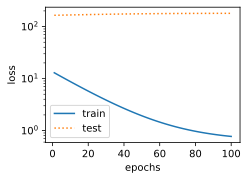

In [8]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])